# Image Preprocessing
---

### Resizing the image data

Before we start building models, we need to resize our photos. They're all 1024 pixels tall and 1024 pixels wide, so we're going to resize them to 256 by 256. This will speed up our modeling epochs and also save storage space, which is great! 

Note: This notebook actually doesn't need to be run by you! One of our team members downloaded the 9,000 photos we wanted to use and ran the code in this notebook to resize all of the images *before* uploading them to GitHub, so the data included in this repo is already correctly sized. You can still run this notebook if you want, but it will simply rewrite the 9,000 images without making any changes. 

In [1]:
# Imports
import os, sys
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

Specify the directory where the data is, and create a list of the folder names for easy iteration.

In [2]:
data_dir = '../data/'

folder_list = ['04000', '05000', '06000',
               '09000', '10000', '11000',
               '13000', '14000', '15000']

The following image resizing function comes from one of the General Assembly lessons on convolutional neural networks. 

In [3]:
def resize(path):
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            
            imResize = im.resize((256,256), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=72)
            
            if e == '.png':
                os.remove(f+e)

Now run through the image folders and apply the `resize()` function to the images. Each folder contains 1,000 images.

In [4]:
for folder in folder_list:
    path = data_dir + folder
    resize(path)
    print('finished with:', path)

finished with: ../data/04000
finished with: ../data/05000
finished with: ../data/06000
finished with: ../data/09000
finished with: ../data/10000
finished with: ../data/11000
finished with: ../data/13000
finished with: ../data/14000
finished with: ../data/15000


The code below is an optional step to zip the image folders for easy uploading to Google Drive. We wrote this code because we intended to use Google Colab for training our model, which is why we wanted to compress our files and potentially work with even more image data.

The code below is in a markdown cell. If you want to run this code you'll need to create a folder in the main directory called 'zipped_data', then copy/paste the code into a code cell, and run it. 

```Python 
zip_dir = '../zipped_data/'

for folder in folder_list:
    path = data_dir + folder +'/'
    save_path = processed_dir + folder + '.zip'

    zipf = zipfile.ZipFile(save_path, 'w', zipfile.ZIP_DEFLATED)
    zipdir(path, zipf)
    zipf.close()
```

Now that our photos are resized, we can start looking at them before we hand them to our model.

---
### Displaying our image data

While we don't want to display all 9,000 photos we used in this project, we do need to explore the data a bit before getting to the modeling. 

Here's a custom list of file paths to a handful of photos in our datasets. Improving upon this process would be a random sample function to randomize these instead of just hand-picking a few.

In [5]:
path_list = ['../data/04000/04000_Mask.jpg', 
            '../data/05000/05001_Mask.jpg',
            '../data/09000/09000.jpg',
            '../data/10000/10001.jpg',
            '../data/13000/13001_Mask_Mouth_Chin.jpg',
            '../data/13000/13002_Mask_Nose_Mouth.jpg']

Let's print out a handful of the faces that we're looking at. You can use `display()` instead of `print()` for images. 

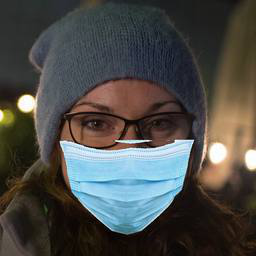

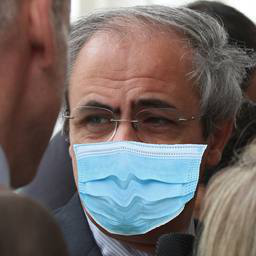

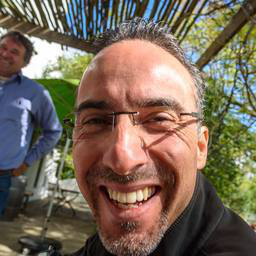

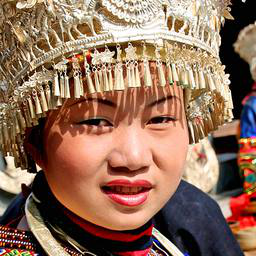

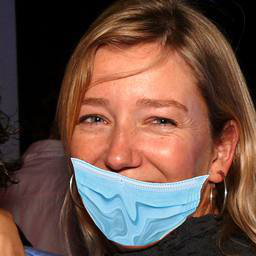

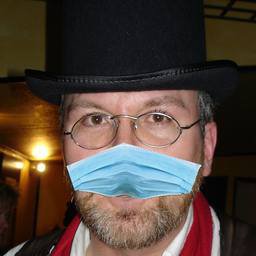

In [6]:
for path in path_list:
    face = load_img(path)
    display(face)

Part of our processing workflow is splitting these images into three different channels: red, green, and blue! We can see what our images look like in each of these channels using the function below, pulled from one of the data science lessons on convolutional neural networks at General Assembly.

---
### RGB channels

The photos have already been resized to 256 pixels wide and 256 pixels tall, and now we can split them into the three color channels: red, blue, and green!

In [7]:
def plot_rgb(arr):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
    temp = arr.copy()
    
    # create R array
    r = np.zeros(temp.shape, dtype='uint8')
    r[:, :, 0] = temp[:, :, 0]
    # plot R
    ax[0].imshow(r)
    ax[0].set_title('R values')
    
    # create G array
    g = np.zeros(arr.shape, dtype='uint8')
    g[:, :, 1] = arr[:, :, 1]
    # plot G
    ax[1].imshow(g)
    ax[1].set_title('G values')
    
    # create B array
    b = np.zeros(arr.shape, dtype='uint8')
    b[:, :, 2] = arr[:, :, 2]
    # plot B
    ax[2].imshow(b)
    ax[2].set_title('B values')

    # strip ticks for clarity
    for each_ax in ax:
        each_ax.set_xticks([])
        each_ax.set_yticks([])
        
    return fig
# f = plot_rgb(face_array)
# f.savefig('rgb_face.png')

Now let's use this function in a loop with our path list.

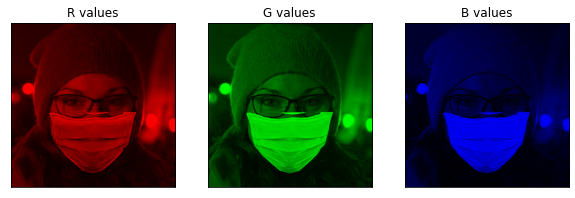

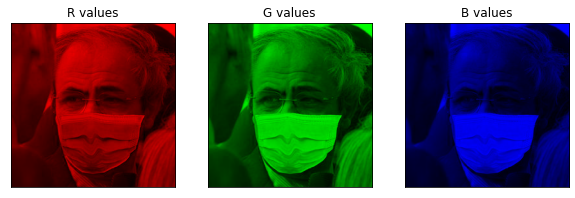

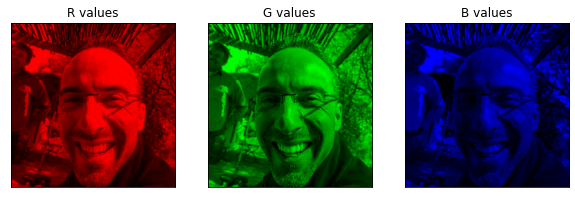

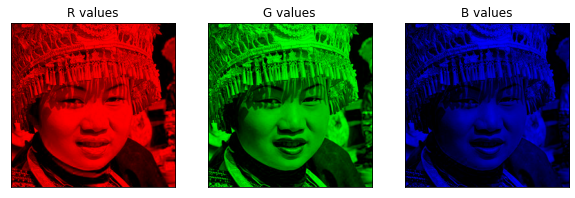

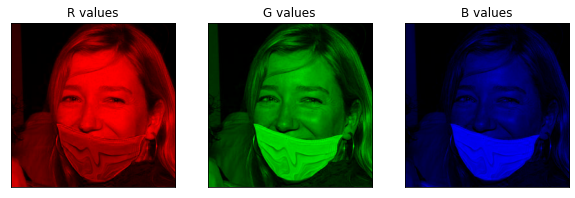

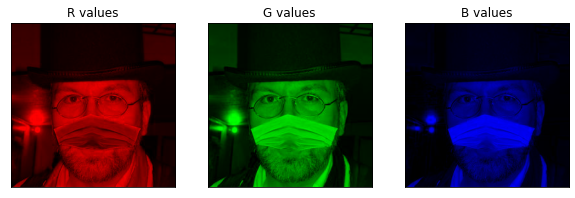

In [8]:
image_list = []
for path in path_list:
    face = load_img(path)
    face_array = img_to_array(face)
    image_list.append(face_array)
    plot_rgb(face_array)

These red, green, and blue arrays are what our model will be working with, but we don't need to save them here, they'll be recreated in the modeling notebook. 